# MNIST classication

This notebook implements some simple neural network based classification models for the MNIST dataset.

In [1]:
from keras.models import Sequential, Model
from keras import Input
from keras.layers.core import Dense, Dropout, Activation
from keras.datasets import mnist
from keras.utils import np_utils, plot_model
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

## Load and inspect data

The MNIST dataset consists of 70,000 images with written digits and the corresponding labels. Each image is 28 pixels wide and 28 pixels high, resulting in 784 pixels. The dataset is split up into training set with 60,000 images and test set with 10,000 images.

In the following, we load training and test sets, normalize the values to the range of 0 to 1 an show the first 20 samples.

11493376/11490434 [==============================] - 3s 0us/step


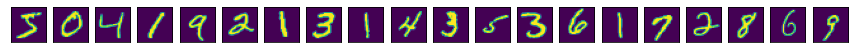

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784).astype("float32") / 255
X_test = X_test.reshape(10000, 784).astype("float32") / 255

plt.figure(figsize=(15,5))
n_images = 20

for i in range(n_images):
    ax = plt.subplot(1, n_images, i + 1)
    plt.imshow(X_train[i].reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

## Model runner

To train and evaluate the model, we take a model, compile it and start training for 20 epochs. For training, we split up the training set into 80% for training and 20% for validation. The validation helps us to get an intuition about the final result for the test set. All optimisations to hyperparameters, such as the learning rate, are done with the validation set without considering the test set. 

In [3]:
def run_model(model, 
              X_train,
              y_train,
              X_test,
              y_test,
              optimizer = RMSprop(learning_rate=0.001),
              loss=SparseCategoricalCrossentropy(from_logits=True)
             ):
    
    model.summary()
    model.compile(
        loss=loss,
        optimizer=optimizer,
        metrics=['accuracy'],
    )

    history = model.fit(
        X_train, 
        y_train, 
        epochs=20,
        validation_split = .2,
        batch_size = 256,
        verbose = 1)

    y_pred = model.predict(X_test).argmax(axis=1)
    cm  = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    return model, history, y_pred

## Model evaluation

The function `show_acc` shows the accuracy for the training and the validation set for the different epochs and thus, illustrates the progress of the training.

In [4]:
def show_acc(history, metric='accuracy'):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

## Model definition: a simple classification model

The first model employs one layer 10 neurons. Given the input vector of size 784 and the 10 neurons, the number of trainable parameters is (784 + 1) * 10 = 7850. For each neuron we use an additional bias variable.

Model: "simple_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
188/188 [==============================] - 1s 3ms/step - loss: 1.8527 - accuracy: 0.7506 - val_loss: 1.6611 - val_accuracy: 0.8780
Epoch 2/20
188/188 [==============================] - 0s 2ms/step - loss: 1.6377 - accuracy: 0.8811 - val_loss: 1.6000 - val_accuracy: 0.9026
Epoch 3/20
188/188 [==============================] - 0s 2ms/step - loss: 1.5993 - accuracy: 0.8984 - val_loss: 1.5795 - val_accuracy: 0.9097
Epoch 4/20
188/188 [==============================] - 0s 2ms/step - loss: 1.5830 - accuracy: 0.9066 - val_loss: 1.5701 - val_accuracy: 0.9138
Epoch 5/20
188/188 [==============================] - 0s 2ms/step - loss: 1.57

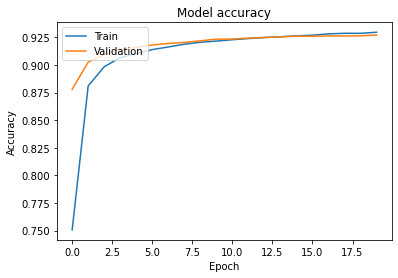

CPU times: user 12.9 s, sys: 979 ms, total: 13.9 s
Wall time: 8.83 s


In [5]:
%%time
simple_model = Sequential(name='simple_model')
simple_model.add(Dense(10,activation='softmax', input_shape=(784,)))

m, h, p = run_model(simple_model, X_train, y_train, X_test, y_test)
show_acc(h)

### Evalutation of the simple model

The very simple model was able to achieve an F-score of 0.93, which is rather impressive, when considering the low complexity of the model. Also training took only a few seconds without relying on GPUs.

We can now start examining the parameters of the model. By looking at the weights of the different neurons, we can surmise the different digits. 

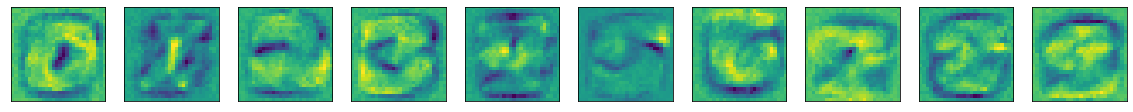

In [6]:
plt.figure(figsize=(20,6))
n_images = 10

weights = m.get_weights()[0]

for i in range(n_images):
    ax = plt.subplot(1, n_images, i + 1)
    plt.imshow(weights[:,i].reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## Model definition: a simple deep classification model

The second model, we're testing here is a bit more complicated. In fact, it employs 3 layers. In contrast to the less complex model, the number of parameters was slightly increased by 220 in the 2nd layer (10 + 1) * 20 = 220 and 210 in 3rd layer (20 + 1) * 10 = 210. In all, this model has 8280 parameters (7850 + 220 + 210 = 8280).

Model: "simple_deep_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 8,280
Trainable params: 8,280
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
188/188 [==============================] - 0s 2ms/step - loss: 1.9745 - accuracy: 0.5478 - val_loss: 1.7876 - val_accuracy: 0.7080
Epoch 2/20
188/188 [==============================] - 0s 2ms/step - loss: 1.7511 - accuracy: 0.7298 - val_loss: 1.7301 - val_accuracy: 0.7406
Epoch 3/20
188/188 [==============================] - 0s 2ms/step - loss: 1.7240 - accuracy: 

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


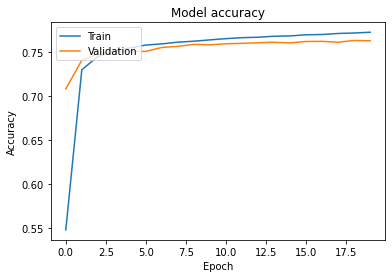

CPU times: user 13.5 s, sys: 1 s, total: 14.5 s
Wall time: 8.9 s


In [7]:
%%time
simple_deep_model = Sequential(name='simple_deep_model')
simple_deep_model.add(Dense(10,activation='relu', input_shape=(784,)))
simple_deep_model.add(Dense(20, activation='relu'))
simple_deep_model.add(Dense(10, activation='softmax'))
m, h, p = run_model(simple_deep_model, X_train, y_train, X_test, y_test)
show_acc(h)

### Model evaluation: simple deep classification model

By looking at the classification result, it turns out that the slightly more complex model results in a  significant drop of the F-score. Let's take a look at the weights of the first layer. Some structure can be obtained, but the digits are harder to obtain.

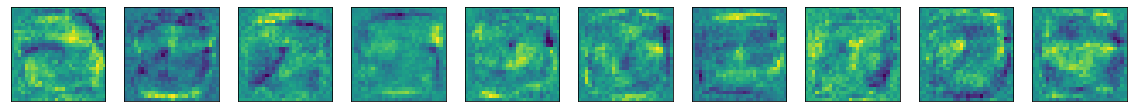

In [8]:
plt.figure(figsize=(20,6))
n_images = 10

weights = m.get_weights()[0]

for i in range(n_images):
    ax = plt.subplot(1, n_images, i + 1)
    plt.imshow(weights[:,i].reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## Model defintion: a complex model

The last model, we examine here is by far more complex than the two previous ones. Like the previous model, it employs three layers but the number of neurons per layer is higher. This results in a much larger. Starting with the first layer, we have (784 + 1) * 400 = 314000, then the second layer with (400 + 1) * 500 = 200500, and finally the last layer with (500 + 1) * 10 = 5010 parameters. resulting a model with 519510 trainable parameters.

Model: "complex_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_5 (Dense)              (None, 500)               200500    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5010      
Total params: 519,510
Trainable params: 519,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
188/188 [==============================] - 2s 9ms/step - loss: 1.5942 - accuracy: 0.8816 - val_loss: 1.5202 - val_accuracy: 0.9449
Epoch 2/20
188/188 [==============================] - 2s 11ms/step - loss: 1.5147 - accuracy: 0.9500 - val_loss: 1.5240 - val_accuracy: 0.9407
Epoch 3/20
188/188 [==============================] - 3s 15ms/step - loss: 1.4992 - accuracy

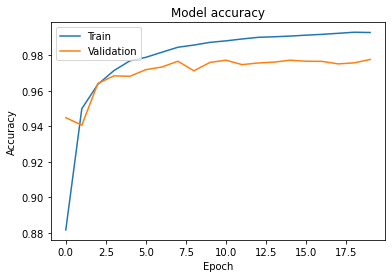

CPU times: user 1min 39s, sys: 3.7 s, total: 1min 43s
Wall time: 46.6 s


In [9]:
%%time
complex_model = Sequential(name='complex_model')
complex_model.add(Dense(400,activation='relu', input_shape=(784,)))
complex_model.add(Dense(500, activation='relu'))
complex_model.add(Dense(10, activation='softmax'))
m, history, _ = run_model(complex_model, X_train, y_train, X_test, y_test)

show_acc(history)

### Model evaluation: complex model with dropout

The evaluation shows an increase in the accuracy. By looking ate the plot however, another interesting observation could be made. The training accuracy outperforms the validation accuracy. This means that the model is better fitted to the training data as to the validation data. This effect is called __overfitting__, and one of the problems with large models. Another hint towards overfitting to the test data is provided by the progress of the validation accuray, which does not increase as the training accuracy, but rather oscilates. There are different ways to prevent overfitting:
 * Increasing the amount of training data
 * Changing the model (e.g., adding dropout layers)
 
Again, we could take a look at the first layer, which do not present such a good representation of the available digits, but shows some interesting features of the dataset.

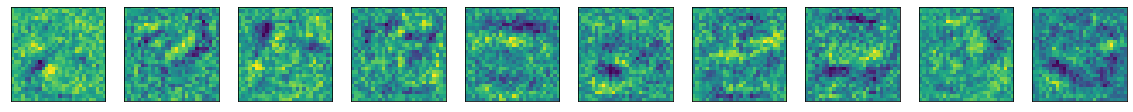

In [10]:
plt.figure(figsize=(20,6))
n_images = 10

weights = m.get_weights()[0]

for i in range(n_images):
    ax = plt.subplot(1, n_images, i + 1)
    plt.imshow(weights[:,i].reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Model definition: complex model with dropouts

The next model is just a variation of the previous model, which includes dropout layers after each layer of the network. Dropout layers disable the training of weight with a given probability (here 0.4), which prevents overfitting.

Model: "complex_model_with_dropout"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 400)               314000    
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 500)               200500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5010      
Total params: 519,510
Trainable params: 519,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
188/188 [==============================] - 2s 11ms/step - loss: 1.6222 - accuracy: 0.8549

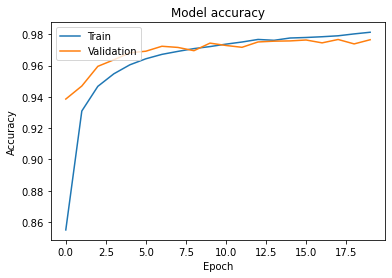

CPU times: user 1min 51s, sys: 4.22 s, total: 1min 55s
Wall time: 43.3 s


In [11]:
%%time
complex_model_with_dropout = Sequential(name='complex_model_with_dropout')
complex_model_with_dropout.add(Dense(400,activation='relu', input_shape=(784,)))
complex_model_with_dropout.add(Dropout(.4))
complex_model_with_dropout.add(Dense(500, activation='relu'))
complex_model_with_dropout.add(Dropout(.4))
complex_model_with_dropout.add(Dense(10, activation='softmax'))
m, h, p = run_model(complex_model_with_dropout, X_train, y_train, X_test, y_test)
show_acc(h)

# Model evalution

The complex model with dropout layers achieves an accuracy of .97 on the test set which is similar to the accuracy on the training set. Also, from the plot it can be seen that both curves increase in a similar manner. We can, thus conclude, that the model does not overfit in the same way as the complex model without dropouts does.